In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import thermal_evolution as te


In [2]:
data_directory = '/Users/kwame/Simulations/THERMAL/RE__Visit/NVB_C009_l20n1024_S12345TAB_thermal_evol'
data_filename_root = 'NVB_C009_l20n1024_S12345T'
data_filename_suffix = '_thermal_evol.dat'
data_legend = '/Users/kwame/Simulations/THERMAL/RE__Visit/legend_TAB.txt'

thermal_evolution_instance = te.ThermalEvolution(data_directory, data_filename_root, data_filename_suffix, data_legend)


In [3]:
print(thermal_evolution_instance.thermal_parameters)


[array([[2.00000e-01, 5.64368e+03, 1.71600e+00, 5.67550e+01],
       [5.00000e-01, 6.52250e+03, 1.68500e+00, 6.47460e+01],
       [1.00000e+00, 7.79340e+03, 1.65300e+00, 6.86710e+01],
       [1.60000e+00, 9.00673e+03, 1.62300e+00, 7.22180e+01],
       [1.80000e+00, 9.35475e+03, 1.61400e+00, 7.29660e+01],
       [2.00000e+00, 9.67815e+03, 1.60700e+00, 7.35340e+01],
       [2.20000e+00, 9.97528e+03, 1.59900e+00, 7.39220e+01],
       [2.40000e+00, 1.02408e+04, 1.59200e+00, 7.45360e+01],
       [2.60000e+00, 1.04739e+04, 1.58500e+00, 7.54200e+01],
       [2.80000e+00, 1.06608e+04, 1.57800e+00, 7.65720e+01],
       [3.00000e+00, 1.07772e+04, 1.57100e+00, 7.78720e+01],
       [3.20000e+00, 1.07973e+04, 1.56200e+00, 7.91000e+01],
       [3.40000e+00, 1.06871e+04, 1.55200e+00, 7.99020e+01],
       [3.60000e+00, 1.04285e+04, 1.54100e+00, 8.05300e+01],
       [3.80000e+00, 1.00145e+04, 1.52800e+00, 8.10590e+01],
       [4.00000e+00, 9.48173e+03, 1.51600e+00, 8.08360e+01],
       [4.20000e+00, 8.

Text(0,0.5,'Filtering length (ckpc)')

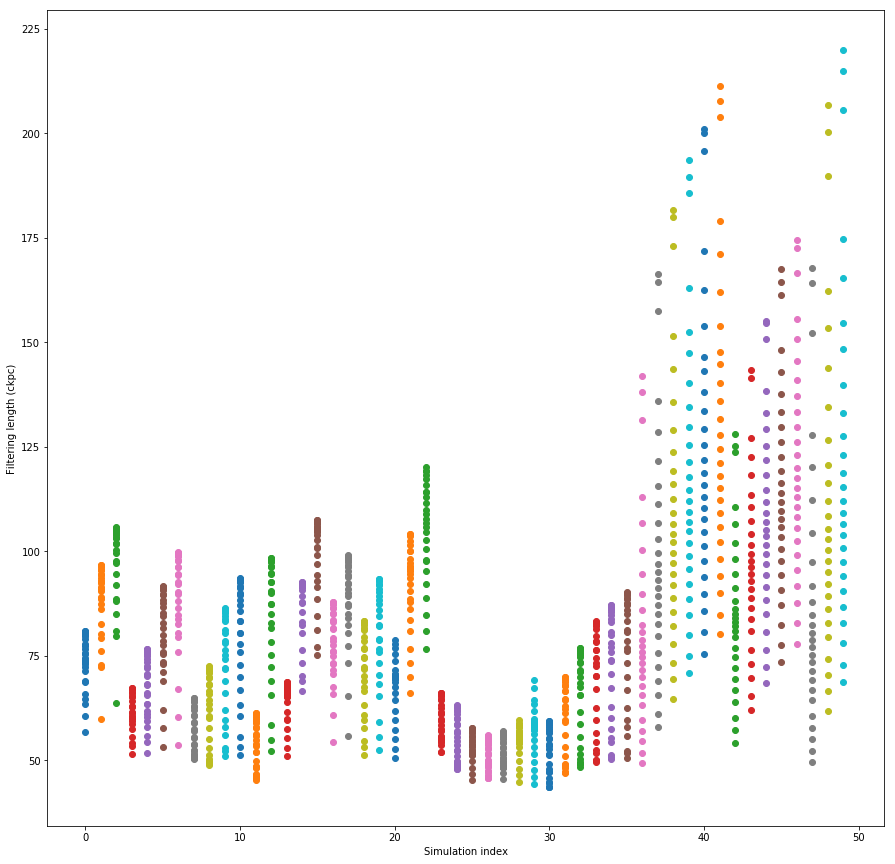

In [4]:
plt.figure(figsize=[15., 15.])
for simulation_index in range(thermal_evolution_instance.n_simulations):
    thermal_parameters_sim = thermal_evolution_instance.thermal_parameters[simulation_index][:, 3]
    plt.scatter([simulation_index,] * thermal_parameters_sim.shape[0], thermal_parameters_sim)
plt.xlabel(r'Simulation index')
plt.ylabel(r'Filtering length (ckpc)')
